In [1]:
%env TIKE_TOMO_BACKEND=cudafft

env: TIKE_TOMO_BACKEND=cudafft


In [2]:
import tike.tomo
import tike.view
import numpy as np
import matplotlib.pyplot as plt

In [3]:
for module in [tike, np]:
    print("{} is version {}".format(module.__name__, module.__version__))

tike is version 0.7.1.dev42+gcfff469.d20191121
numpy is version 1.17.2


# Create test data

Make a test data for pytchography reconstruction at one projection angle.

### Define the object

Normalize input uint8 images to the `[0, 1]` and `[0, pi]` ranges.

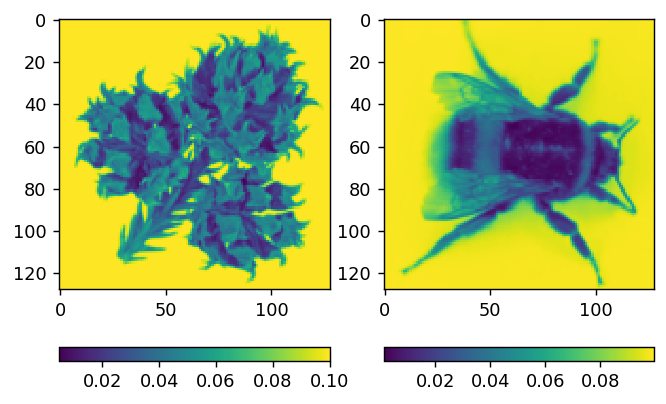

(1, 128, 128)

In [4]:
delta = plt.imread("../tests/data/Cryptomeria_japonica-0128.tif") / 2550
beta = plt.imread("../tests/data/Bombus_terrestris-0128.tif") / 2550
np.min(delta), np.max(beta)

original = np.empty(delta.shape, dtype='complex64')
original.real = delta
original.imag = beta
original = np.tile(original, (1, 1, 1))
tike.view.plot_complex(original[0])
original.shape

### Define trajectory


In [5]:
N_ANGLE = 256
theta = np.linspace(0, np.pi, N_ANGLE, endpoint=False, dtype='float32')
theta.shape

(256,)

# Simulate data acquisition

In [6]:
data = tike.tomo.simulate(obj=original, theta=theta)
data.shape

(256, 1, 128)

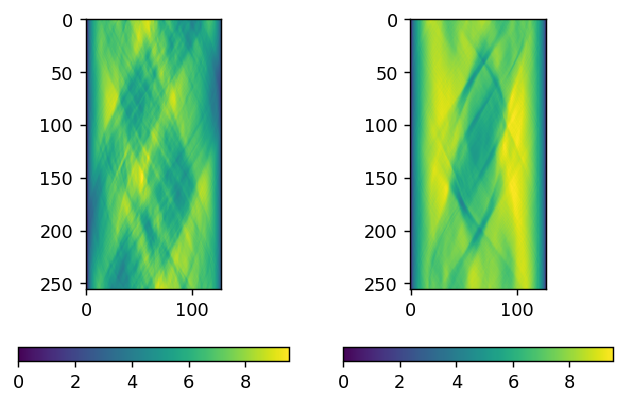

In [7]:
tike.view.plot_complex(data[:,0,:])

# Reconstruct the data

In [8]:
result = {
    'obj': np.zeros(original.shape, dtype='complex64')
}

   8, 1.000e+00, 0, 1.0746957e+03


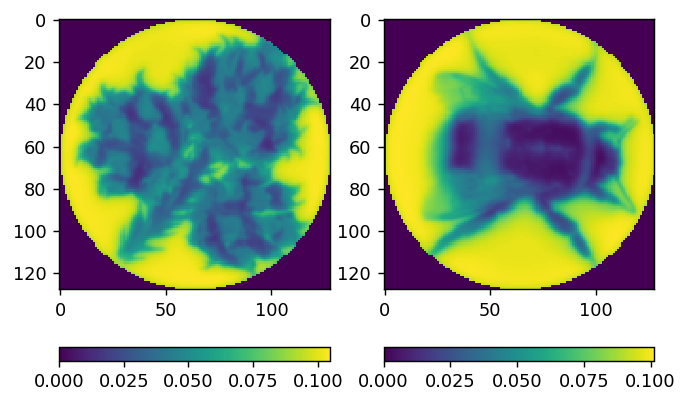

   8, 1.000e+00, 0, 8.8404015e+01


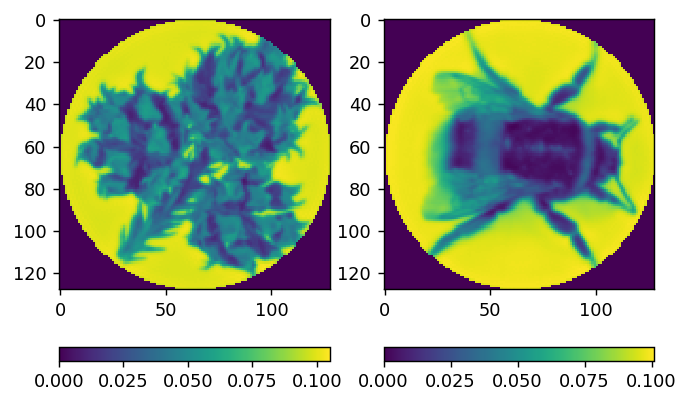

   8, 1.000e+00, 0, 1.7786476e+01


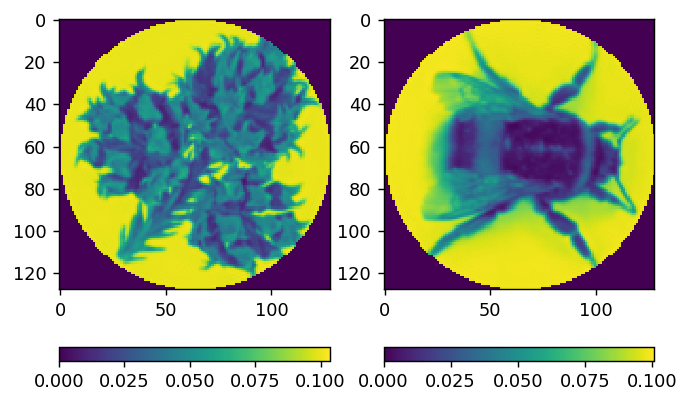

   8, 1.000e+00, 0, 4.8638649e+00


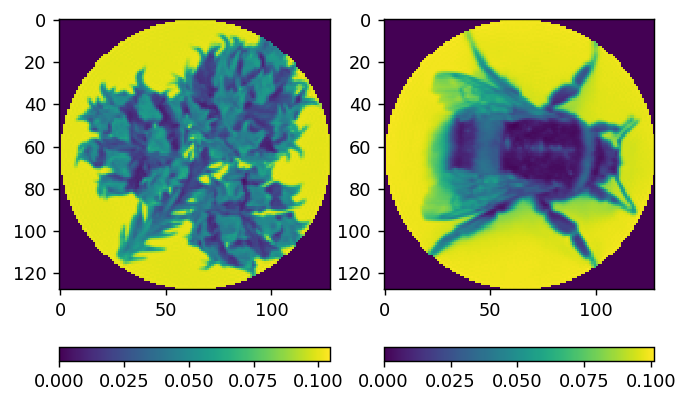

   8, 1.000e+00, 0, 1.5990338e+00


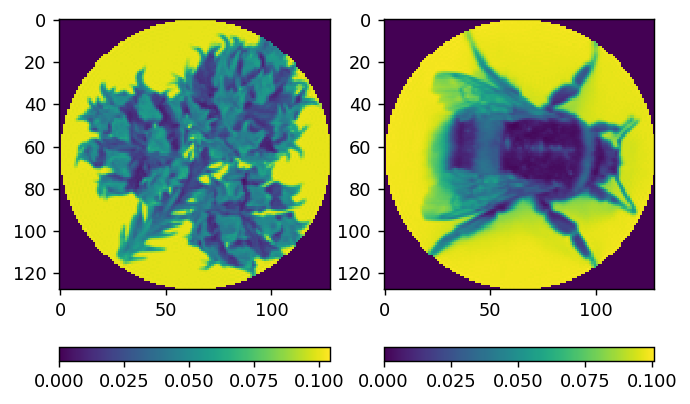

   8, 1.000e+00, 0, 5.8509111e-01


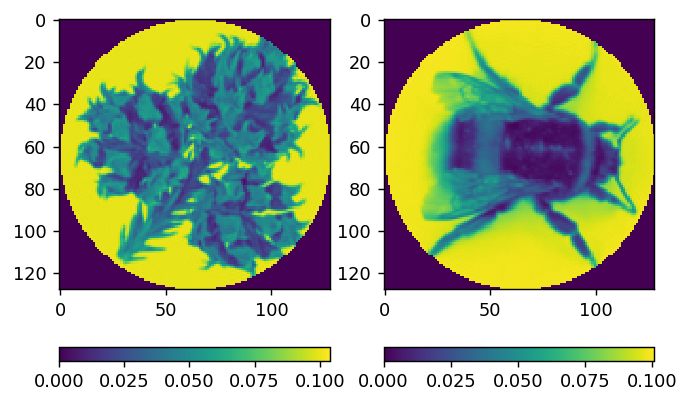

   8, 1.000e+00, 0, 2.1316704e-01


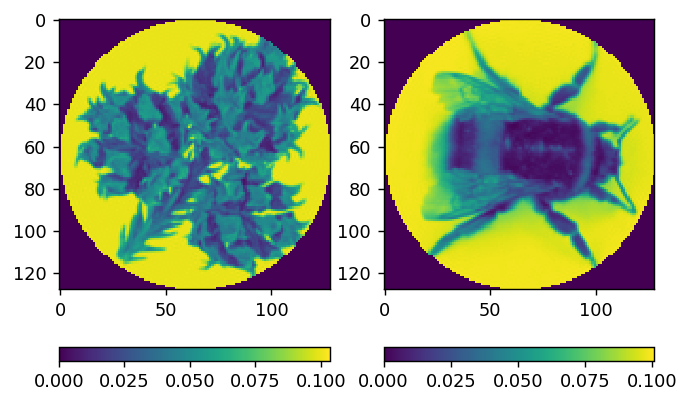

   8, 1.000e+00, 0, 1.0587175e-01


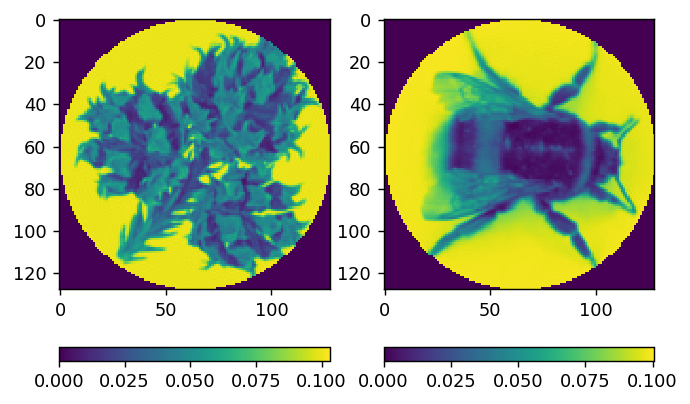

   8, 1.000e+00, 0, 4.8632812e-02


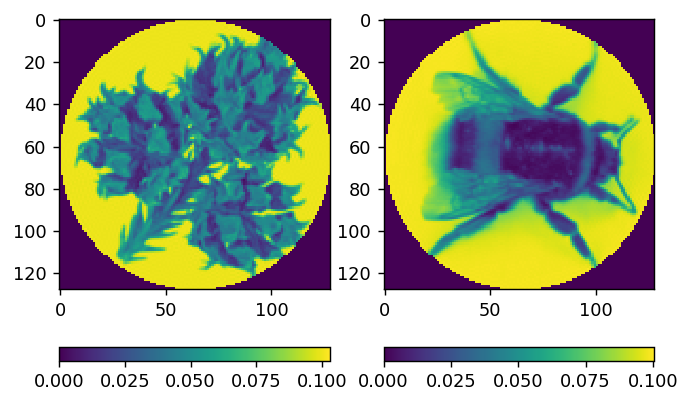

   8, 1.000e+00, 0, 3.1968977e-02


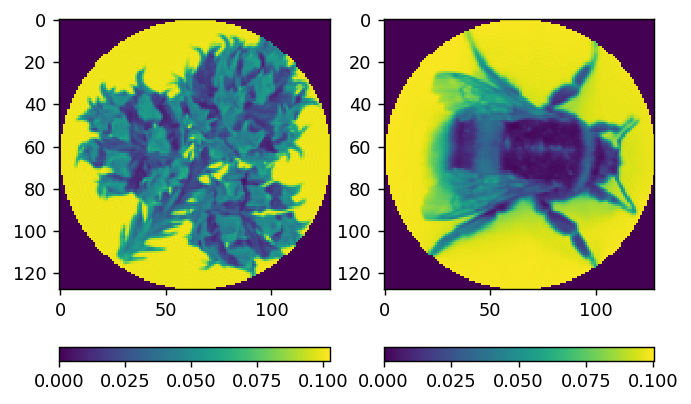

In [9]:
for i in range(10):
    result = tike.tomo.reconstruct(
        **result,
        theta=theta,
        integrals=data,
        algorithm='cgrad',
        num_iter=8,
    )
    tike.view.plot_complex(result['obj'][0])